# Titel: Large-Scale Self-Supervised Pretraining for Railway Sound Detection

Author: Gabriel Schachinger 

Advisor: DI Georg Brandmayr 

FH-Prof. Priv.-Doz. Mag. Dr. David Meyer 

Date: 27.11.2023




# Short Project Description:

### Basic idea:
The programming problem is the sound classification of Rail Way Sound Data. These are divided into four classes. A rough overview can be seen in the notebook: analyse_labeled_data.ipynb
It is important to mention here that a large data set of unlabeled data and a small data set of labeled railway sound data. 

**labeled:** #4718

**unlabeled:** cas 1.5 terabytes of data but used for the first pretraining methods #44773 data points. (After cleanup and selection of a recording device)


### Problem definition: 
Very high effort for labeling sound data. However, there is a large amount of unlabeled data that contains a lot of information.
The goal is to create a pretraining model with the help of deepleaning, which is pre-trained on the unlabeled data in order to learn the features from this data in the best possible way and then fine-tuned on the labeled data.

Division into two parts of the project:
- Supervised learning:
    - Clasification only on the labeled data. Multiple models, best architecture Resnet-50




- Self-supervised model + finetune model:
    - 2 phase model: same architecture as from Supervised model pre-training on unlabeled data and fintuning on labeled data. To outperform the only Supervised Model. 


### Progression so far

- Supervised model trained and tested with Resnet-50 architecture

- So far 2 pretraining methods applied:
    - Contrastive triplet loss model: Multiple models, Best architecture Resnet-50

    - Masked Autoencoder Model: Multiple models, best architecture Resnet-50

Rough procedure:

1. creation supervised model. Very good results have already been achieved here.
2. Pretraining Contrastive Loss: Use of Pretraining Pipelines for this Model Ordenr "Pipelines"
3. pretraining Masked Autoencoder: Use of Pretraining Pipelines for this Model Ordenr "Pipelines"
4. finetuning with both models. Use the same finetune pipeline. Same as for supervised model
5. compare results


# Structure Notebooks:


## Pipelines:

**Pipelines are located in the Python file "Pipeline_FT_SA.py "**

**There are 4 pipelines:**

- **Mypipeline: Finetunbe Pipeline:**

    - Important parameters:

        - Length in seconds of the audio file (Azfrgand different lengths, as it must be the same length for batching)
        - Train on or off: (effects on length and masking)
        - Frequency and time mask size

    - Augumentation:

        - Time and Freq masking

    - Process:

        - load wav file 
        - resample if necessary
        - random crop or pad: 
        - If shorter than parameter "desired_length" the rest is filled with zero and randomly mapped left, center or right
        - If longer, a part is randomly cut out with the length "desired_length"
        - create a spectrogram from waveform
        - augumentation on spectrogram

    - Output:
    
        - 1.Melspec




- MypipelinePretrain:**

    - Important parameters:

        - length in seconds of the audio file (Azfrgand different lengths, as it must be the same length for batching)
        - Train on or off: (effects on length and masking)
        - Frequency and time mask size

    - Augumentation:

        - Time masking
        - Freq Masking
        - Time Shift
        - Vol perturbation
        - additive noise

    - Process:

        - load wav file 
        - resample if necessary
        - random crop or pad: 
        - If shorter than parameter "desired_length" the rest is filled with zero and randomly mapped left, center or right
        - If longer, a part is randomly cut out with the length "desired_length"
        - augumentation on waveform
        - create mel spectrogram from waveform
        - augumentation on spectrogram

    - Output:

        - 1.Melspec


- MypipelinePretrain_2:**

    - Important parameters:
        - length in seconds of the audio file (Azfrgand different lengths, as it must be the same length for batching)
        - Train on or off: (effects on length and masking)
        - Frequency and time mask size
        - Maximum shift of the time axis (A waveform is processed with different augumetations (positive and anchor pair). The drawing axis is also shifted by a maximum of this value in seconds)

    - Augumentation:

        - Time masking
        - Freq Masking
        - Time Shift
        - Vol perturbation
        - additive noise

    - Process:

        - load wav file 
        - resample if necessary
        - random crop or pad: 
        - If shorter than parameter "desired_length" the rest is filled with zero and randomly mapped left, center or right
        - If longer, a part is randomly cut out with the length "desired_length"
        - 2 x augumentation on waveform the same waveform
        - create a spectrogram from waveforms
        - 2 x augumentation on spectrogram

    - Output:

        - 2 x Mel Spectrogram (Anchor and Positive)



- MyPipelinePretrain_Auto:**

    - Important parameters:
        - Length in seconds of the audio file (different lengths, as it must be the same length for batching)
        - Train on or off: (effects on length and masking)
        - Frequency and time mask size

    - Augumentation:

        - Time masking
        - Freq Masking
        - Process:
        - load wav file 
        - resample if necessary

    - random crop or pad: 
        - If shorter than parameter "desired_length" the rest is filled with zero and randomly mapped left, center or right
        - If longer, a part is randomly cut out with the length "desired_length"
        - create a spectrogram from waveforms
        - 1 x augumentation on spectrogram

    - Output:
    
        - 1 x masked mel spectrogram and 1 x original mel spectrogram




## Dataloader:

There are a total of 3 Dataloader Python files:

- ***DL_finetune/ADSMI_DL_TVsplit.py*** (Finetune on labeled railroad data / Train, Val and Test Split)
- ***DL_Autoencoder/DL_Auto.py*** (Autoencoding Pretraining)
- ***DL_pretrain/ADSMI_DL_NP_pretrain.py*** (Contrastive pretraining)

### Fine tuning:
- Division into batches
- train batch length depending on desired_length_seconds parameter
- validation batch size = 1 so that full length can be read in
- uses Mypipeline() (fine tuning)

- Output:
    - Time- and freq-masked Mel spectrogram
    - Name


### Autoencoder Pretrain:
- Split into batches
- train batch length depending on desired_length_seconds parameter
- uses Mypipeline_Auto()

- Output:
    - Time and frequency-masked Mel spectrogram
    - Mel spectrogram (the same as above only unmasked)



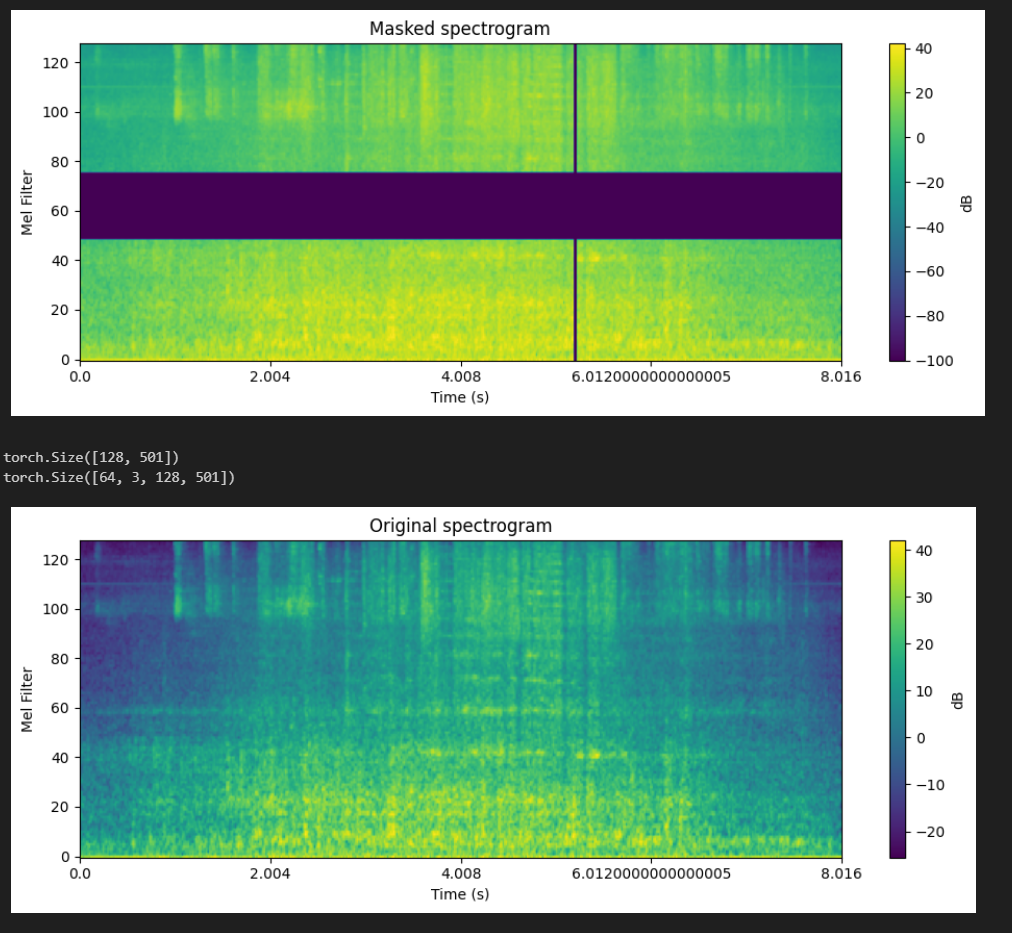

### Contrastive Pretrain:
- split into batches
- train batch length depending on desired_length_seconds parameter
- uses Mypipeline_pretrain_2() and Mypipeline_pretrain()

- Output:
    - 3 x augumented Melspectrogram (Anchor, Positive , Negative)
    - Anchor and Positive is the same audio track augumented differently
    - Negative is a completely different audio track but also augumented

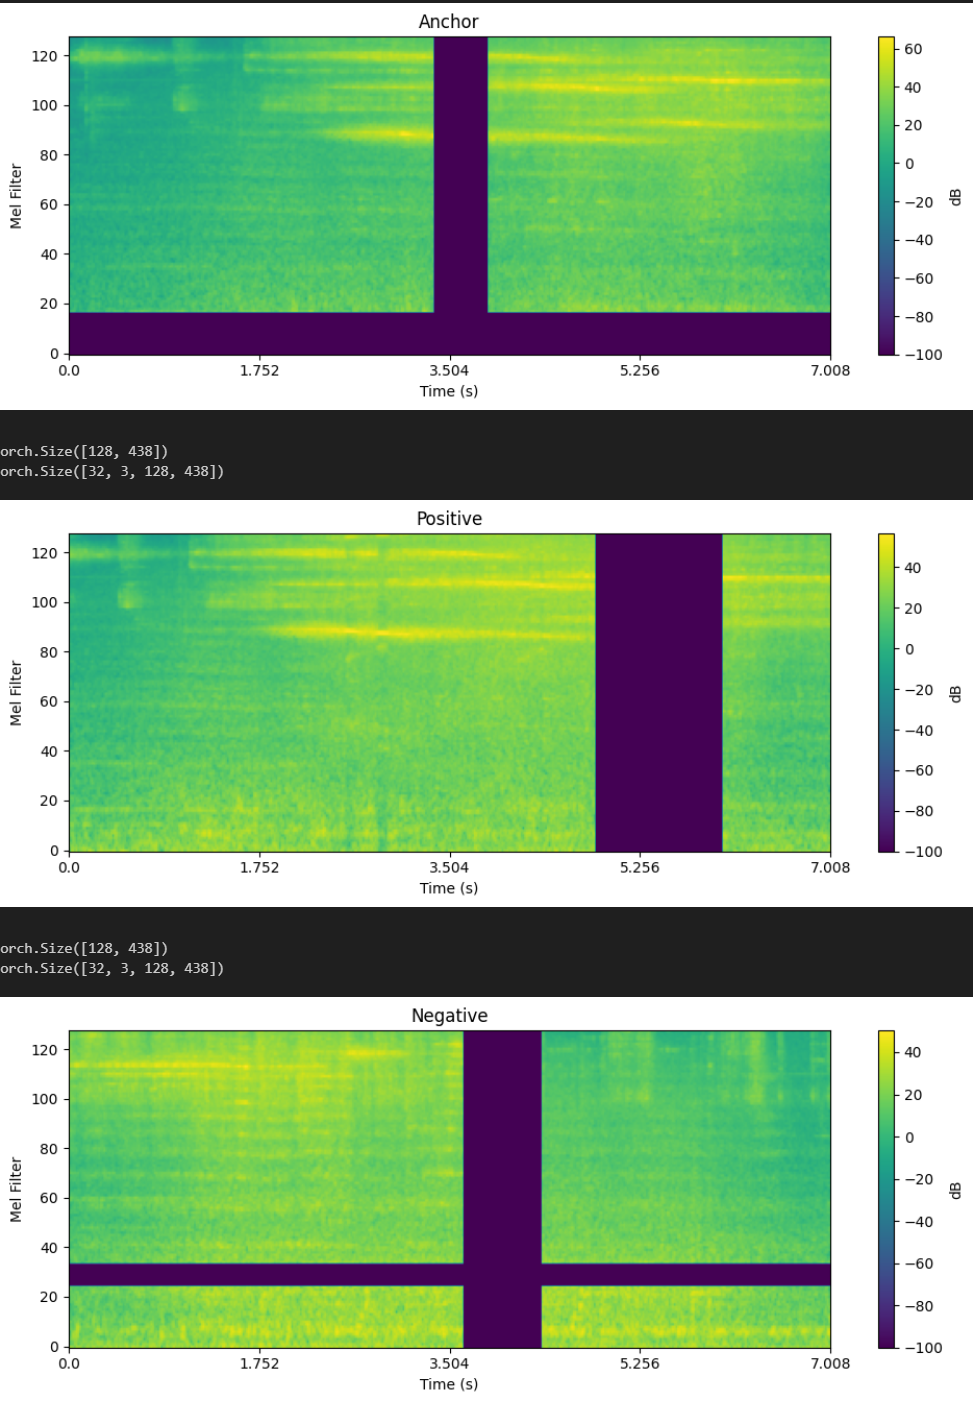

## Notebooks Training

### Pretraining:

***Pretrain_Auto.ipynb***

***Pretraining_Contrastive_Model.ipynb***

### Finetuning:

***Finetune_NB_Autoencoder.ipynb***

***Finetune_NB_ContrastiveModel.ipynb***

### Supervised Model training:

***SA_Notebook_Train_Test_Val.ipynb***


## Data Overview:

***analyse_labeled_data.ipynb***
***create_labeled_data_dir.ipynb ***
***Data_read_ALL.ipynb***

## Results Folder:
A checkpoint is saved for each finetune and standalone monitored model each time the validation loss has decreased or val accuracy has increased. 
After the epochs expire or when the patience of the earlyx stopping is reached, the entire model is also saved.

The following is saved in the Fine Tune folders:

- checkpoint.pth (best val accuracy)
- checkpoint_best_loss.pth
- Full_model_checkpoint.pth

- confusion_matrix_best.png
- confusion_matrix_best_loss.png
- confusion_matrix_full.png

- log_file.txt (Training log)
- results_file_best.txt (Results summary and Parameter overview)
- results_file_best_loss.txt
- results_file_full.txt


For the Pretrain models only at loss reduction and at the end of the training:

- checkpoint.pth
- training_log.txt





# Example Comparision Supervised Model vs Contrastive + finetune Model with the exact same Parameter for learning:

## Example Results: (Supervised)

########################################################

Frequency Mask:7

Time Mask: 50

        Spectro:
                n_fft=2048,
                hop_length = 512,
                n_mels=128,  
                win_length = 2048,

Epochs: 120

Batch size: 32

Optimizer: Adam

Learning rate: 0.0003

Weight decay: 0

Scheduler: ReduceLROnPlateau

Model: ModifiedResnet50_Classifier 

classifiers: 512, 256, 4 : 2 fully connected layers

########################################################


Balanced Accuracy2: 88.93%

Test Accuracy: 92.58%

Evaluation Results:

Precision: 92.78%

Recall: 92.58%

F1-score: 92.53%

Kappa: 88.19%

########################################################

Confusion Matrix:

[[214   2   4   0]

 [ 14  58   0   0]

 [  9   1 153   3]

 [  0   2   0  12]]

########################################################

Classifcation Report:                          precision    recall  f1-score   support

                 [Kreischen]           0.90      0.97      0.94       220
        [Kreischen][Quietschen]        0.92      0.81      0.86        72
                [Negativ]              0.97      0.92      0.95       166
                [Quietschen]           0.80      0.86      0.83        14

                accuracy                                   0.93       472
                macro avg              0.90      0.89      0.89       472
                weighted avg           0.93      0.93      0.93       472

## BSP Results: (Finetune on contrastive Model)

########################################################
Frequency Mask:7

Time Mask: 50

Random State:96 

Spectro:

        n_fft=2048,

        hop_length = 512,

        n_mels=128,  

        win_length = 2048,

Epochs: 120

Batch size: 32

Optimizer: Adam

Learning rate: 0.0003

Weight decay: 0

Scheduler: ReduceLROnPlateau

Model: ModifiedResnet50_Classifier 

classifiers: 512, 256, 4 : 2 fully connected layers

########################################################

Balanced Accuracy2: 94.55%

Test Accuracy: 93.64%

Evaluation Results:

Precision: 93.66%

Recall: 93.64%

F1-score: 93.64%

Kappa: 89.98%

########################################################

        Confusion Matrix:

                [[208   5   7   0]
                [  7  65   0   0]
                [  9   1 155   1]
                [  0   0   0  14]]
 
########################################################

Classifcation Report:                          precision    recall  f1-score   support

                [Kreischen]       0.93      0.95       0.94       220
        [KreischenQuietschen]     0.92      0.90       0.91        72
                [Negativ]         0.96      0.93       0.95       166
                [Quietschen]      0.93      1.00       0.97        14

                accuracy                               0.94       472
                macro avg          0.93      0.95      0.94       472
                weighted avg       0.94      0.94      0.94       472